In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
%matplotlib inline

In [2]:
wifi = pd.read_excel("./custom-data/clean/wifi.xlsx")
wifi

,都道府県名,市区町村名,名称,住所
0,沖縄県,那覇市,今酒屋米丸,那覇市 港町2-3-8
1,沖縄県,那覇市,沖縄鮮魚卸琉通協同組合,那覇市 港町1-1-18
2,沖縄県,那覇市,居酒屋 イカリ亭,那覇市 曙1-20-25
3,沖縄県,那覇市,M’sニューポート,那覇市 曙2-1-1
4,沖縄県,那覇市,バリバリ,那覇市 曙1-13-17
...,...,...,...,...
6332,大阪府,大阪市,南海電気鉄道 特急サザン 車両Wi-Fi,大阪府大阪市中央区難波5丁目1番60号
6333,大阪府,大阪市,南海電気鉄道 特急サザンプレミアム 車両Wi-Fi,大阪府大阪市中央区難波5丁目1番60号
6334,大阪府,大阪市,南海電気鉄道 特急りんかん 車両Wi-Fi,大阪府大阪市中央区難波5丁目1番60号
6335,大阪府,大阪市,南海電気鉄道 特急こうや 車両Wi-Fi,大阪府大阪市中央区難波5丁目1番60号


In [3]:
wifi_count = pd.DataFrame(wifi.groupby("市区町村名").count()["名称"])
wifi_count.columns = ["wifi設置数"]
wifi_count

,wifi設置数
市区町村名,
うるま市,151
与那原町,53
中城村,24
久米島町,1
交野市,7
...,...
金武町,14
門真市,45
阪南市,11


In [4]:
info_df = pd.read_excel("./custom-data/clean/osaka_okinawa_info.xlsx")
info_df

,市区町村名,人口総数,15歳未満-人口,15～64歳-人口,65歳以上-人口,外国人人口,出生数,死亡数,転入者数,転出者数,昼間人口,事業所数,第２次産業事業所数,第３次産業事業所数,小売店数,飲食店数,15歳未満-割合,15～64歳-割合,65歳以上-割合
0,札幌市,1952356,221013,1235516,483534,8820,14021,18504,118336,109199,1959740,76604,9321,67178,11498,9124,0.113203,0.632833,0.247667
1,函館市,265979,27131,152154,85931,771,1532,3637,8718,9791,273408,13795,1839,11912,2689,1872,0.102004,0.572053,0.323074
2,小樽市,121924,11171,65317,45240,411,512,1856,3121,3970,124293,6090,884,5197,1373,821,0.091623,0.535719,0.371051
3,旭川市,339605,37173,191423,106444,613,2280,4060,10282,11029,341732,15201,2219,12906,2639,1840,0.109460,0.563664,0.313435
4,室蘭市,88564,9185,49005,30118,297,503,1220,2999,3771,96865,4423,683,3739,764,669,0.103710,0.553329,0.340070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7870,久米島町,7755,1218,4475,2052,34,58,109,428,516,7790,604,147,440,111,58,0.157060,0.577047,0.264603
7871,八重瀬町,29066,5315,18012,5610,60,405,230,1563,1348,24992,790,133,641,155,53,0.182860,0.619693,0.193009
7872,多良間村,1194,208,671,315,14,12,15,59,65,1180,87,14,71,13,5,0.174204,0.561977,0.263819
7873,竹富町,3998,680,2469,798,38,57,48,517,502,4197,489,37,441,58,57,0.170085,0.617559,0.199600


In [5]:
df = info_df.merge(wifi_count, left_on="市区町村名", right_index=True, how="inner")
df = df.set_index("市区町村名")
df = df.astype(float)
df

,人口総数,15歳未満-人口,15～64歳-人口,65歳以上-人口,外国人人口,出生数,死亡数,転入者数,転出者数,昼間人口,事業所数,第２次産業事業所数,第３次産業事業所数,小売店数,飲食店数,15歳未満-割合,15～64歳-割合,65歳以上-割合,wifi設置数
市区町村名,,,,,,,,,,,,,,,,,,,
大阪市,2691185.0,295298.0,1682798.0,668698.0,79568.0,22099.0,27815.0,154352.0,144878.0,3543449.0,191854.0,27907.0,163890.0,28451.0,26145.0,0.109728,0.625300,0.248477,1822.0
堺市,839310.0,112964.0,495966.0,224064.0,10589.0,6844.0,7951.0,31901.0,33107.0,785324.0,30128.0,5697.0,24410.0,5084.0,3430.0,0.134592,0.590921,0.266962,262.0
岸和田市,194911.0,26903.0,117058.0,50357.0,1644.0,1483.0,1956.0,4065.0,4960.0,175695.0,7727.0,1495.0,6220.0,1509.0,848.0,0.138027,0.600572,0.258359,55.0
豊中市,395479.0,53939.0,239768.0,99979.0,3894.0,3487.0,3487.0,17835.0,17154.0,349896.0,13877.0,2124.0,11744.0,2198.0,1571.0,0.136389,0.606272,0.252805,127.0
池田市,103069.0,13229.0,62134.0,26342.0,1133.0,747.0,819.0,4522.0,4243.0,94541.0,3869.0,354.0,3505.0,694.0,576.0,0.128351,0.602839,0.255576,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
粟国村,759.0,94.0,414.0,251.0,2.0,3.0,10.0,48.0,50.0,773.0,62.0,13.0,49.0,8.0,4.0,0.123847,0.545455,0.330698,24.0
伊平屋村,1238.0,237.0,675.0,326.0,11.0,7.0,17.0,77.0,89.0,1234.0,102.0,25.0,74.0,18.0,9.0,0.191438,0.545234,0.263328,11.0
久米島町,7755.0,1218.0,4475.0,2052.0,34.0,58.0,109.0,428.0,516.0,7790.0,604.0,147.0,440.0,111.0,58.0,0.157060,0.577047,0.264603,1.0


In [6]:
df.drop(["大阪市"], axis=0).describe()

,人口総数,15歳未満-人口,15～64歳-人口,65歳以上-人口,外国人人口,出生数,死亡数,転入者数,転出者数,昼間人口,事業所数,第２次産業事業所数,第３次産業事業所数,小売店数,飲食店数,15歳未満-割合,15～64歳-割合,65歳以上-割合,wifi設置数
count,74.000000,74.000000,74.000000,74.00000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.00000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,102144.729730,14077.878378,61310.486486,25434.27027,1110.472973,853.283784,919.364865,3711.351351,3819.716216,95861.054054,3956.50000,699.472973,3248.013514,685.027027,468.932432,0.145587,0.596395,0.249548,61.013514
std,139953.844176,18546.870537,83309.399454,36541.87260,2161.289805,1135.177501,1290.113392,5181.212349,5254.157056,133000.855580,5466.80723,1210.057909,4404.366188,892.554683,666.922873,0.028282,0.027998,0.050750,113.385087
min,759.000000,94.000000,414.000000,172.00000,2.000000,3.000000,9.000000,48.000000,50.000000,773.000000,62.00000,6.000000,49.000000,8.000000,4.000000,0.078910,0.500372,0.165726,1.000000
25%,16131.500000,2060.250000,9537.500000,3590.00000,81.750000,130.250000,153.500000,587.750000,672.250000,15292.000000,627.75000,90.500000,527.000000,117.000000,58.500000,0.128011,0.581582,0.213342,11.000000
50%,57160.500000,8520.000000,33855.500000,13450.50000,362.500000,480.000000,512.500000,2119.000000,2135.000000,51991.000000,2167.50000,340.000000,1810.000000,413.000000,206.000000,0.139932,0.599839,0.254832,29.500000
75%,117731.500000,14667.000000,72217.250000,31013.00000,1020.750000,877.750000,1070.000000,4092.750000,4321.000000,111822.500000,4798.25000,836.250000,3902.000000,814.750000,574.000000,0.170221,0.618217,0.272958,65.500000
max,839310.000000,112964.000000,495966.000000,224064.00000,13564.000000,6844.000000,7951.000000,31901.000000,33107.000000,785324.000000,30128.00000,7838.000000,24410.000000,5084.000000,3430.000000,0.203681,0.644238,0.406471,838.000000


In [7]:
df.sort_values("wifi設置数", ascending=False).head(5)

,人口総数,15歳未満-人口,15～64歳-人口,65歳以上-人口,外国人人口,出生数,死亡数,転入者数,転出者数,昼間人口,事業所数,第２次産業事業所数,第３次産業事業所数,小売店数,飲食店数,15歳未満-割合,15～64歳-割合,65歳以上-割合,wifi設置数
市区町村名,,,,,,,,,,,,,,,,,,,
大阪市,2691185.0,295298.0,1682798.0,668698.0,79568.0,22099.0,27815.0,154352.0,144878.0,3543449.0,191854.0,27907.0,163890.0,28451.0,26145.0,0.109728,0.625300,0.248477,1822.0
那覇市,319435.0,49811.0,200177.0,63513.0,2978.0,3176.0,2604.0,14560.0,15757.0,349980.0,18289.0,1189.0,17085.0,3487.0,3331.0,0.155935,0.626660,0.198829,838.0
沖縄市,139279.0,25466.0,88084.0,24933.0,1314.0,1765.0,1003.0,6083.0,5871.0,136976.0,5581.0,477.0,5097.0,1158.0,1018.0,0.182842,0.632428,0.179015,341.0
浦添市,114232.0,20910.0,72626.0,19476.0,724.0,1355.0,727.0,5187.0,5513.0,117401.0,5368.0,556.0,4812.0,757.0,660.0,0.183049,0.635776,0.170495,284.0
堺市,839310.0,112964.0,495966.0,224064.0,10589.0,6844.0,7951.0,31901.0,33107.0,785324.0,30128.0,5697.0,24410.0,5084.0,3430.0,0.134592,0.590921,0.266962,262.0


<Axes: xlabel='15歳未満-割合', ylabel='wifi設置数'>

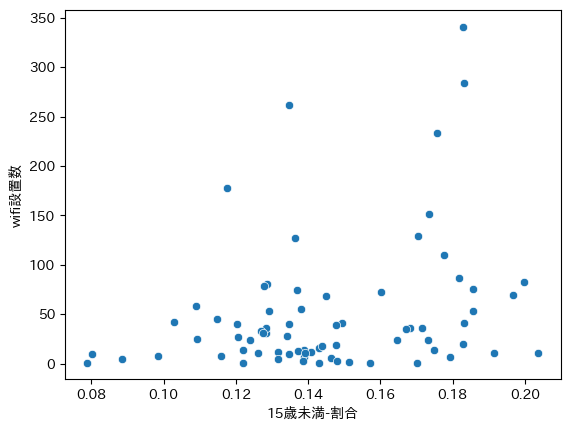

In [9]:
sns.scatterplot(data=df.drop(["大阪市", "那覇市"], axis=0), x="15歳未満-割合", y="wifi設置数")